<a href="https://colab.research.google.com/github/yaldayaqubi24/final_Assignment/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt


Loading and Exploring Data

In [5]:
data = pd.read_csv('housing.csv')

In [6]:
data.shape

(20640, 10)

In [7]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Missing Data Analysis

In [10]:
def get_aboveThreshol_nan_cols(data, threshold):
    nan_counts = data.isna().sum() # Count NaN values per column
    cols_above_threshold = nan_counts > threshold
    return nan_counts[cols_above_threshold].index

In [11]:
data_null = data[get_aboveThreshol_nan_cols(data, 0)]

In [12]:
data_null.head()

,total_bedrooms
0,129.0
1,1106.0
2,190.0
3,235.0
4,280.0


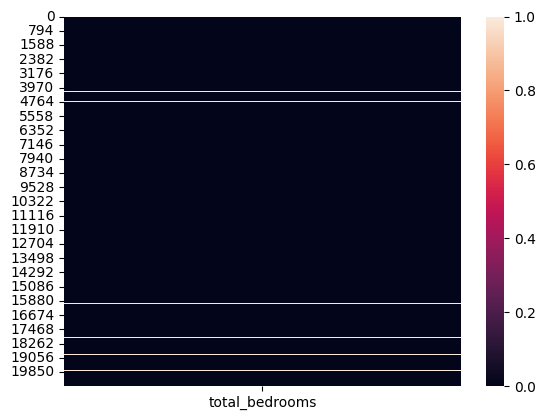

In [13]:
sns.heatmap(data_null.isnull())
plt.show()

In [14]:
data_null.isna().sum()

,0
total_bedrooms,207


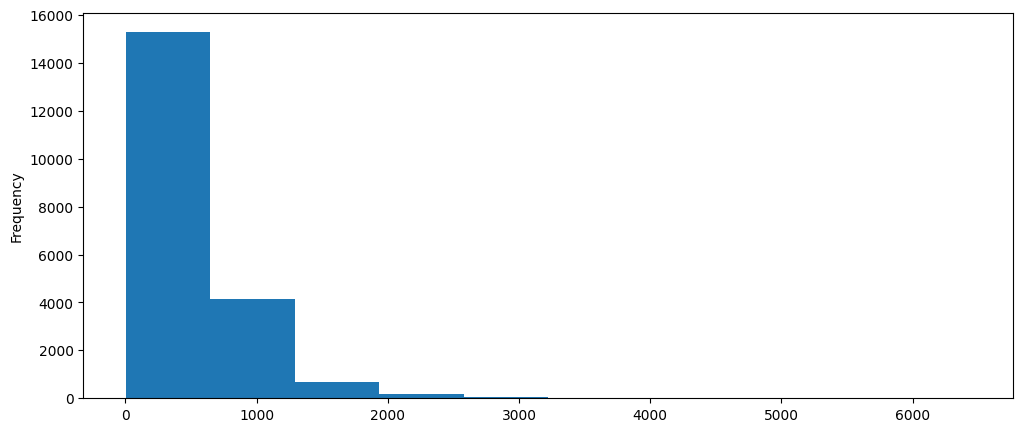

In [15]:
data_null['total_bedrooms'].plot(kind='hist', figsize=(12, 5))
plt.show()

In [16]:
# Replace missing values with median
data_cleaned = data.copy()
data_cleaned['total_bedrooms'] = data_cleaned['total_bedrooms'].fillna(data['total_bedrooms'].median())
# Verify that missing values have been removed
print("\nMissing values in each column after removal:")
print(data_cleaned.isnull().sum())


Missing values in each column after removal:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


Dealing with Outliers

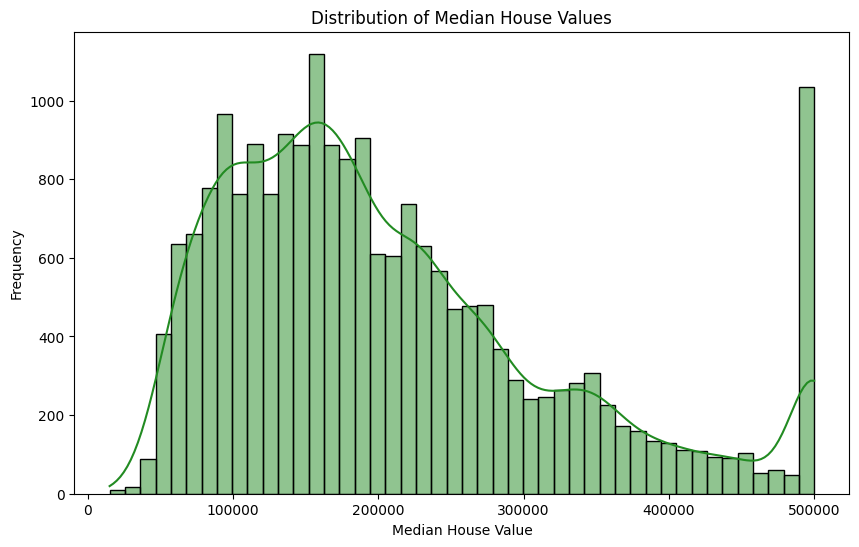

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['median_house_value'], color='forestgreen', kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

In [18]:
def remove_outliers(df, col_name):
    Q1 = df[col_name].quantile(0.25)
    print(Q1)
    Q3 = df[col_name].quantile(0.75)
    print(Q3)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]
    return df

data_no_outliers_1 = remove_outliers(data_cleaned, 'median_house_value')
print("Original data shape:", data_cleaned.shape)
print("New data shape without outliers:", data_no_outliers_1.shape)

119600.0
264725.0
Original data shape: (20640, 10)
New data shape without outliers: (19569, 10)


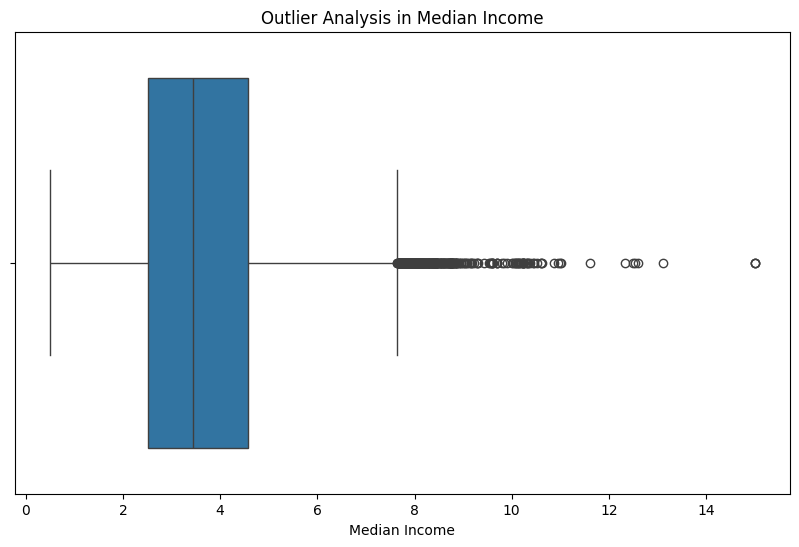

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_no_outliers_1['median_income'])
plt.title('Outlier Analysis in Median Income')
plt.xlabel('Median Income')
plt.show()

In [20]:
data_no_outliers_2 = remove_outliers(data_no_outliers_1, 'median_house_value')

116200.0
246700.0


In [21]:
print("Original data shape:", data_no_outliers_1.shape)
print("Data shape without outliers:", data_no_outliers_2.shape)

Original data shape: (19569, 10)
Data shape without outliers: (19297, 10)


In [22]:
data = data_no_outliers_2

Dealing with Categorical Data

In [23]:
# Unique value count for categorical data
for column in ['ocean_proximity']:  # Add other categorical columns if any
    print(f"Unique values in {column}:", data[column].unique())

Unique values in ocean_proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [24]:
ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'], prefix='ocean_proximity')
data = pd.concat([data.drop("ocean_proximity", axis =1), ocean_proximity_dummies], axis=1)
ocean_proximity_dummies

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
5,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [25]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [26]:
data = data.drop("ocean_proximity_ISLAND", axis = 1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [27]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,False,False,True,False


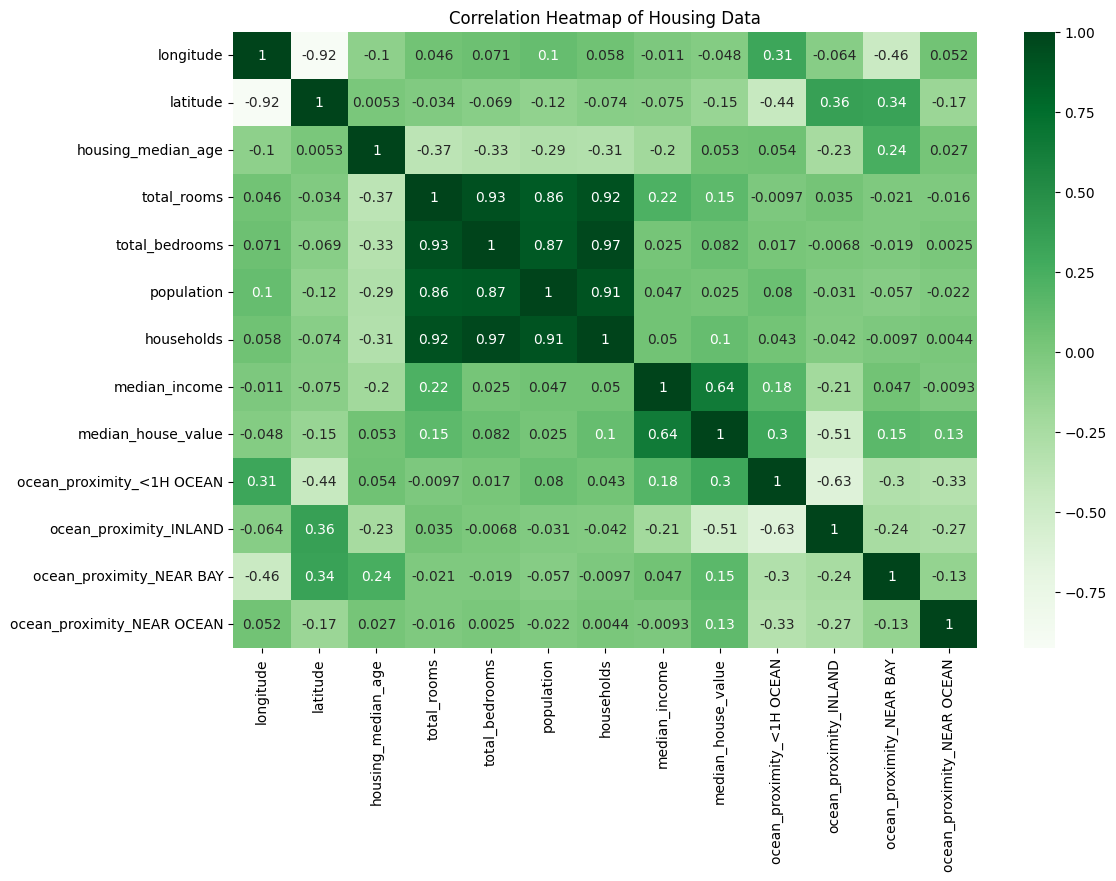

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='Greens')
plt.title('Correlation Heatmap of Housing Data')
plt.show()

In [29]:
data.corr()['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.642835
ocean_proximity_<1H OCEAN,0.302847
ocean_proximity_NEAR BAY,0.154710
total_rooms,0.149012
ocean_proximity_NEAR OCEAN,0.133777
households,0.104236
total_bedrooms,0.081814
housing_median_age,0.052809
population,0.024811


In [30]:
data = data.drop(["population", "longitude", "latitude"], axis = 1)
data.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'households',
       'median_income', 'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [31]:
# Define your features (independent variables) and target (dependent variable)
X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]


# Split the data into a training set and a testing set
# test_size specifies the proportion of the data to be included in the test split
# random_state ensures reproducibility of your split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 15437 samples
Test set size: 3860 samples


**bold text**
**Train a Linear Regression Model**

In [32]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

In [33]:
# Create and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = lr.predict(X_test_scaled)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Output the performance metrics
print(f'RMSE on Test Set: {rmse:0.4f}')

RMSE on Test Set: 57314.8201


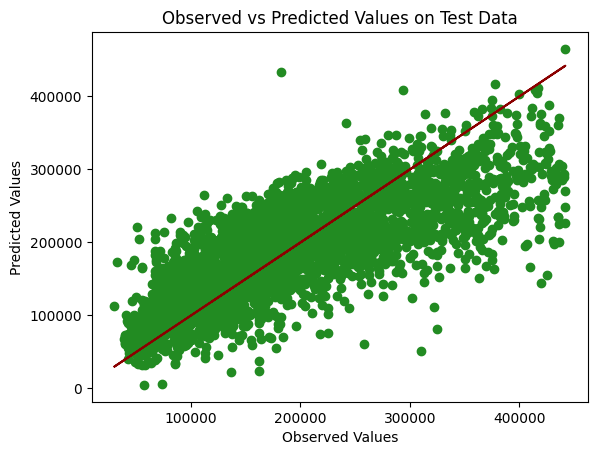

In [34]:
plt.scatter(y_test, y_pred, color = "forestgreen")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred')  # line for perfect prediction (true values)
plt.show()

In [35]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [36]:
# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred_rf)
rmse = sqrt(mse)

# Output the performance metrics
print(f'RMSE on Test Set: {rmse:0.4f}')

RMSE on Test Set: 56231.5692


In [37]:
# Define the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Parameter grid to test key hyperparameters
param_grid = {
    'n_estimators': [100, 200],         # Number of trees
    'max_depth': [5, 10],        # Maximum depth of each tree
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Output best parameters
print("Best parameters found:", grid_search.best_params_)

# Make predictions with the best estimator
y_pred_rf_best = grid_search.best_estimator_.predict(X_test)

# Calculate RMSE
rmse_rf_best = sqrt(mean_squared_error(y_test, y_pred_rf_best))

# Output the improved RMSE
print(f'Improved RMSE on Test Set: {rmse_rf_best:0.4f}')

Best parameters found: {'max_depth': 10, 'n_estimators': 200}
Improved RMSE on Test Set: 55448.1586


In [38]:
# Bonus step: how to submit output to Kaggle competition
# final = pd.DataFrame()
# final['Input'] = test_df['Input']
# final['Output'] = pred

# final.to_csv('output.csv', index = False)